In [1]:
import pandas as pd

import numpy as np

In [2]:
df = pd.read_csv('playground-series-s5e10/train.csv')

In [3]:
df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [4]:
cat_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat_cols.append(col)


In [5]:
cat_cols

['road_type', 'lighting', 'weather', 'time_of_day']

In [6]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Value counts for column: {col}")
        print(df[col].value_counts())
        print("-" * 40)


Value counts for column: road_type
road_type
highway    173672
rural      172719
urban      171363
Name: count, dtype: int64
----------------------------------------
Value counts for column: lighting
lighting
dim         183826
daylight    178015
night       155913
Name: count, dtype: int64
----------------------------------------
Value counts for column: weather
weather
foggy    181463
clear    179306
rainy    156985
Name: count, dtype: int64
----------------------------------------
Value counts for column: time_of_day
time_of_day
morning      173410
evening      172837
afternoon    171507
Name: count, dtype: int64
----------------------------------------


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [8]:
df.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849975,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


In [9]:
skew_cols = []

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']: 
        skew_val = df[col].skew()
        if skew_val > 0.5:
            print(f'{col} is positively skewed (skew={skew_val:.2f})')
            skew_cols.append(col)
        elif skew_val < -0.5:
            print(f'{col} is negatively skewed (skew={skew_val:.2f})')
            skew_cols.append(col)
        else:
            print(f'{col} is not skew')


id is not skew
num_lanes is not skew
curvature is not skew
speed_limit is not skew
num_reported_accidents is not skew
accident_risk is not skew


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

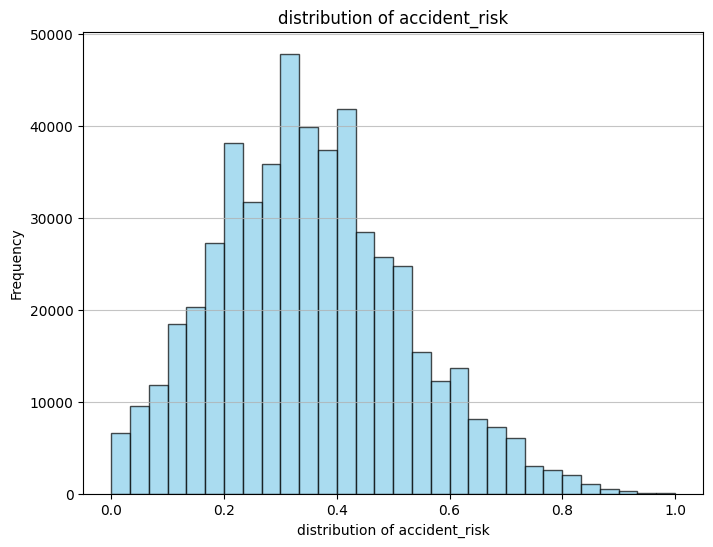

In [18]:
plt.figure(figsize=(8,6))
plt.hist(df['accident_risk'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('distribution of accident_risk')
plt.xlabel('distribution of accident_risk')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [12]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)

Index(['id', 'num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents',
       'accident_risk'],
      dtype='object')


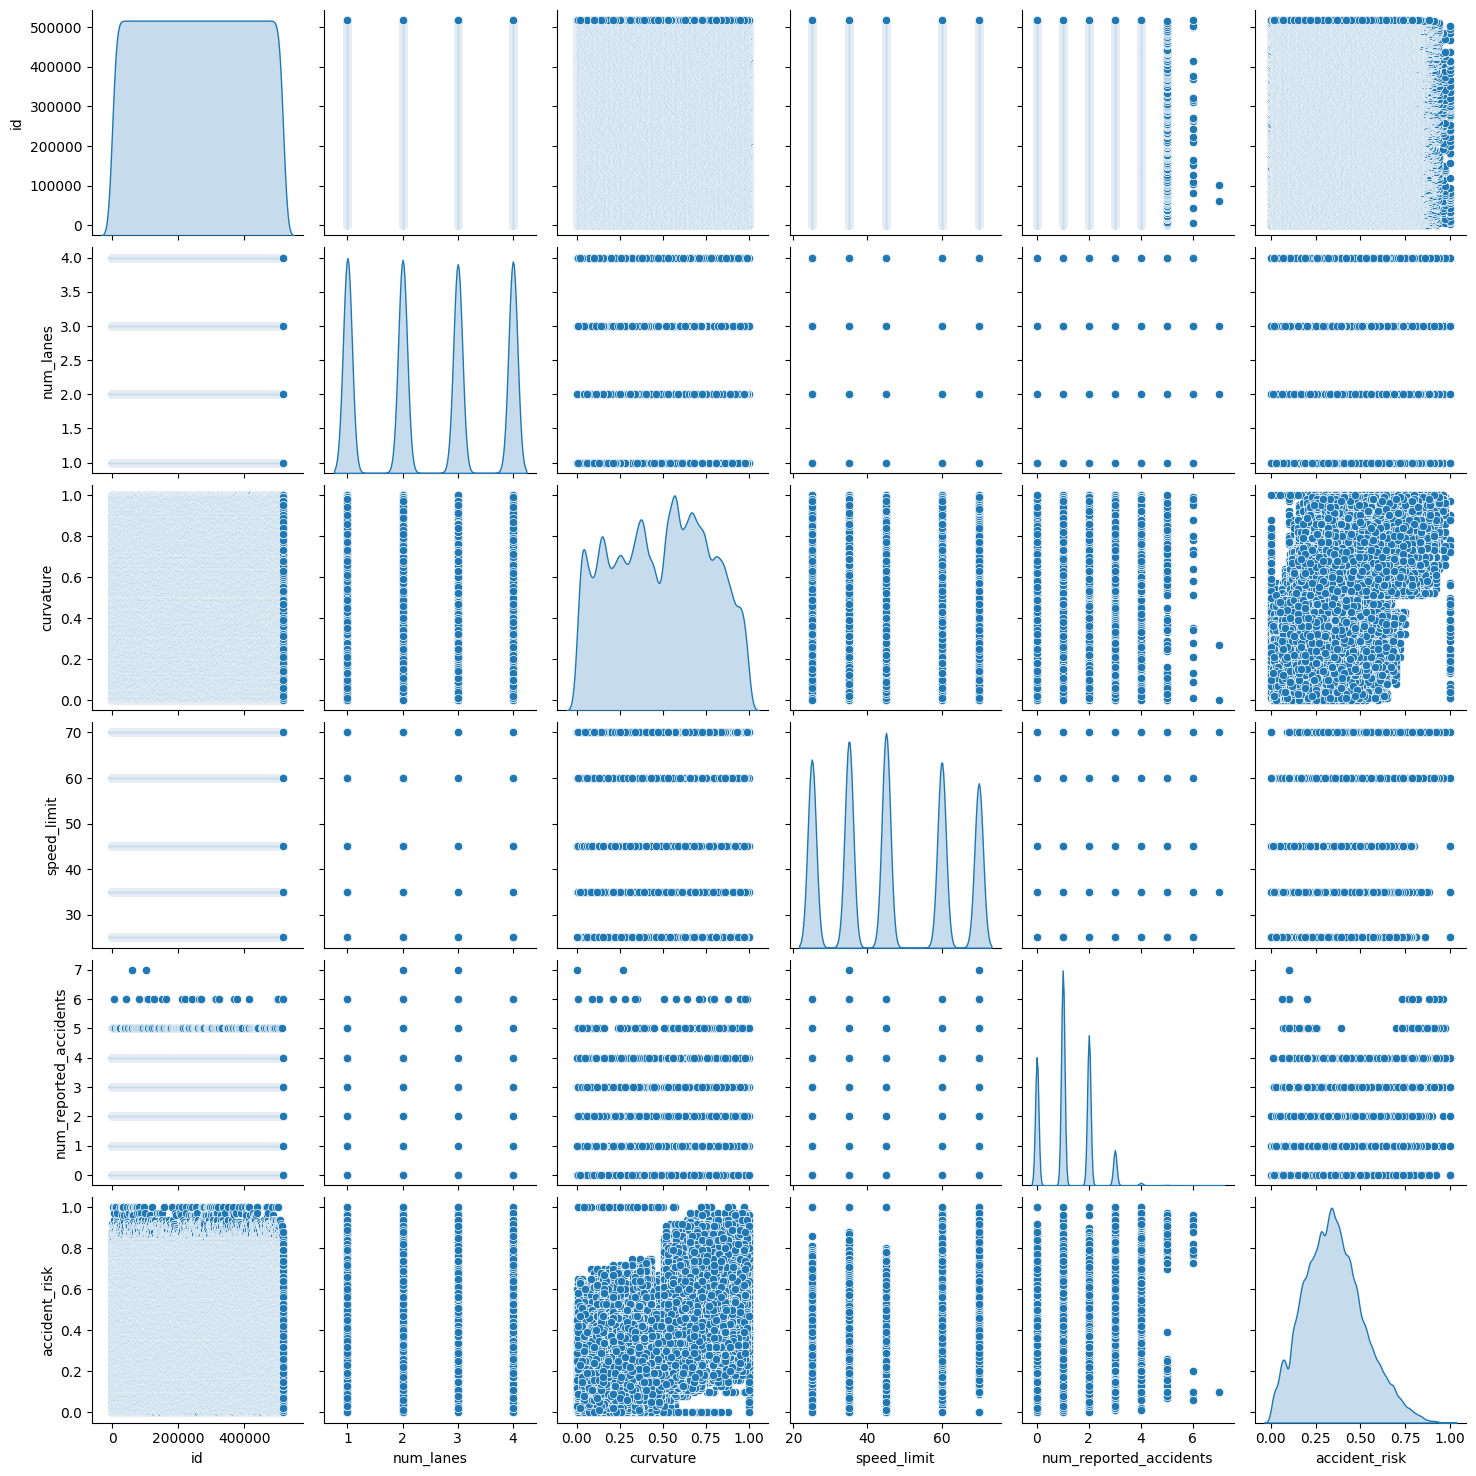

In [16]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df[numeric_cols], kind='scatter', diag_kind='kde', corner=False)
plt.show()

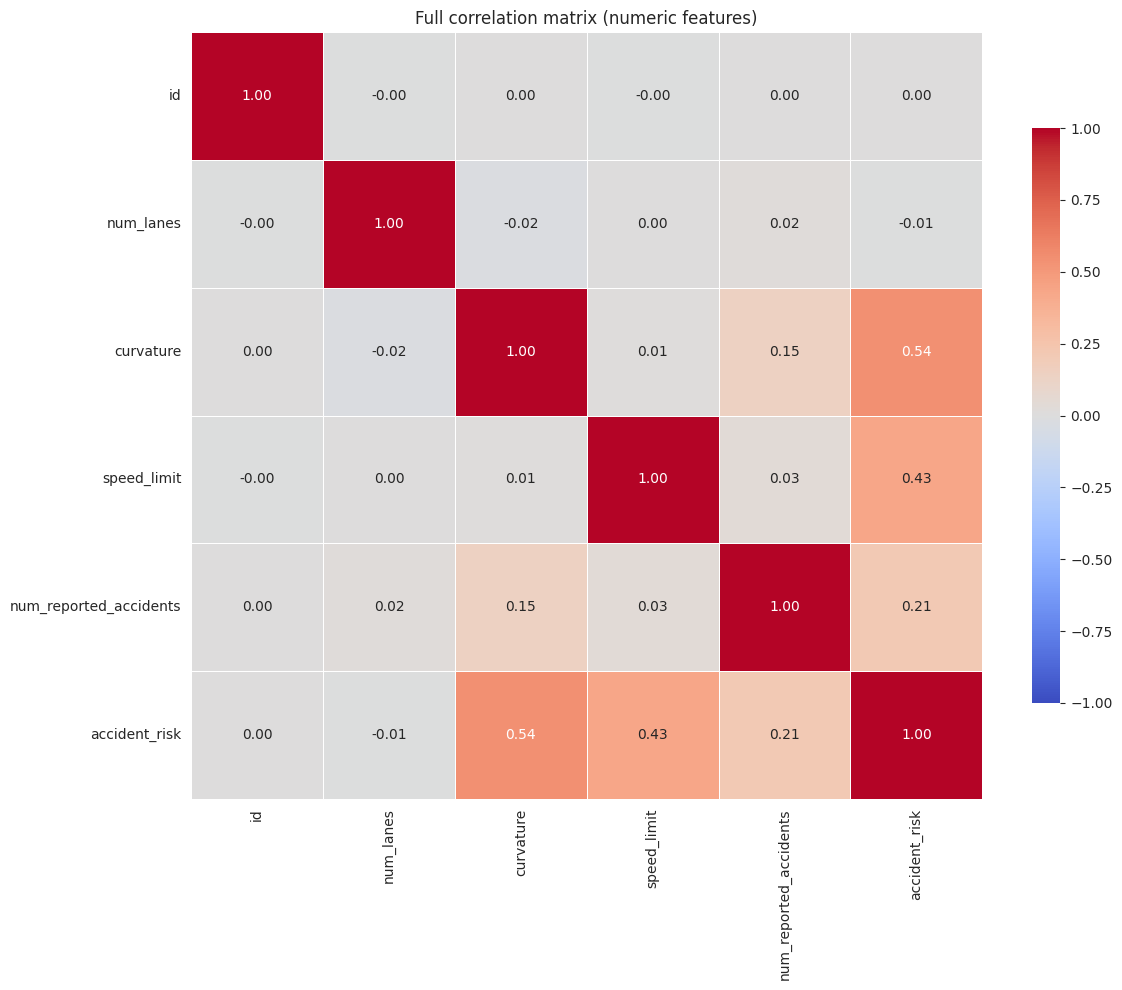

In [25]:
num_df = df.select_dtypes(include=['number']).copy()
corr = num_df.corr()
plt.figure(figsize=(12,10))
sns.set_style("white")
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f",
            linewidths=.5, cbar_kws={"shrink": .75}, vmin=-1, vmax=1, square=False)
plt.title("Full correlation matrix (numeric features)")
plt.tight_layout()
plt.show()

the data is normally distributed and low bias and  High varience